### 01. 로지스틱 회귀
- 일상 속 풀고자하는 많은 문제 중에서는 두 개의 선택지 중에서 정답을 고르는 문제가 많다.
    - 시험을 봤는데 이 시험 점수가 합격인지 불합격인지 ?
    - 어떤 메일을 받았을 때 이게 정상 메일인지 스팸 메일인지 ?
- 이진 분류(Binary Classification) : 둘 중 하나를 결정하는 문제
- 로지스틱 회귀(Logistic Regression) : 이진 분류를 풀기 위한 대표적인 알고리즘

- 로지스틱 회귀는 알고리즘의 이름은 회귀이지만 실제로는 분류 작업에 사용할 수 있다.

#### 1. 이진 분류(Binary Classification)

학생들이 시험 성적에 따라서 합격과 불합격이 기재된 데이터가 있을 때,
- 시험 성적이 x라면 합불 결과는 y
- 이 시험의 커트라인은 공개되지 않았는데 이 데이터로부터 특정 점수를 얻었을 때의 합격, 불합격 여부를 판정하는 모델을 만들고 싶다.

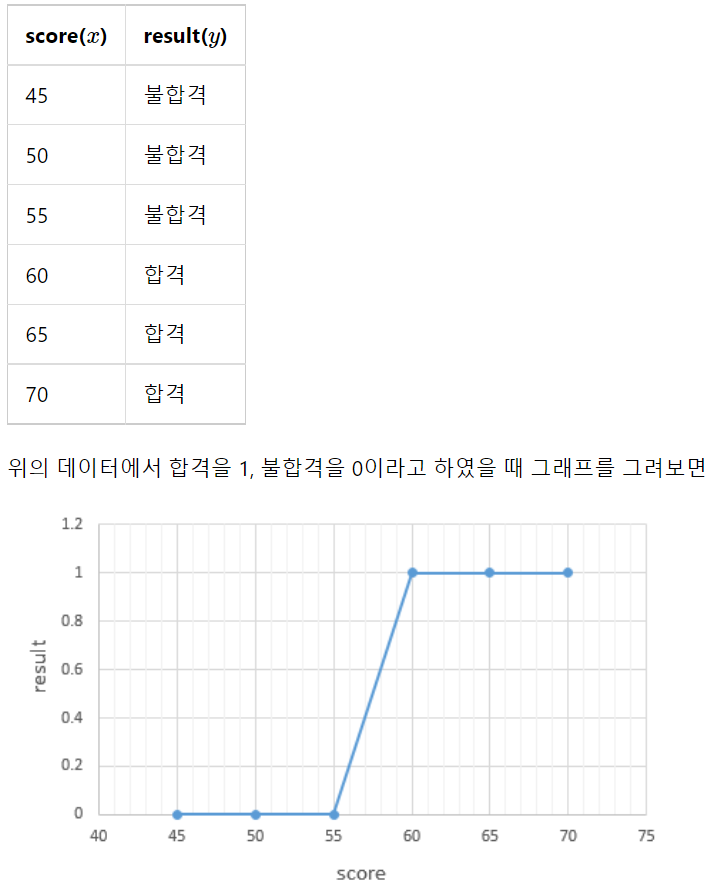

In [5]:
from IPython.display import Image
Image("scoredata.PNG")

- 이러한 점들을 표현하는 그래프는 S자 형태로 표현된다.
    - 이러한 x와 y의 관계를 표현하기 위해서는 Wx+b와 같은 직선 함수가 아니라 S자 형태로 표현할 수 있는 함수가 필요
    - 이런 문제에 직선을 사용할 경우 분류 작업이 잘 동작하지 않는다.

- 로지스틱 회귀의 가설은 선형 회귀 때의 H(x)=Wx+b가 아니라, 위와 같이 S자 모양의 그래프를 만들 수 있는 어떤 특정 함수 f를 추가적으로 사용하여 H(x)=f(Wx+b)의 가설을 사용
    - 위와 같이 S자 모양의 그래프를 그릴 수 있는 어떤 함수 f가 이미 널리 알려져 있는데, **시그모이드 함수**이다. 

-----------------------------------------------------------------------------------------------------------

#### 2. 시그모이드 함수(Sigmoid function)
- 방정식 : H(x) = sigmoid(Wx+b) = 1/[1+e^-(Wx+b)] 
    - 선형 회귀에서와 마찬가지로, 최적의 W와 b를 찾는 것이 목표이다.
    - W와 b가 함수의 그래프에 어떤 영향을 주는지 직접 그래프를 그리며 보기


- 파이썬에서는 그래프를 그릴 수 있는 도구로서 Matplitplib을 사용할 수 있다.

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 넘파이를 사용하여 시그모이드 함수를 정의
def sigmoid(x) : 
    return 1/(1+np.exp(-x))

##### 1. W가 1이고 b가 0인 그래프

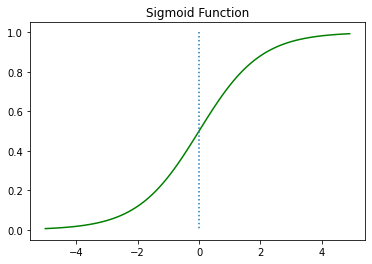

In [13]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
# 가운데 점선 추가
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

[해석]
- 위의 그래프를 통해 시그모이드 함수는 출력값을 0과 1사이의 값으로 조정하여 반환함을 알 수 있다. 
- x가 0일 때, 0.5의 값을 가진다.
- x가 매우 커지면 1에 수렴하고 x가 매우 작아지면 0에 수렴한다.

##### 2. W값의 변화에 따른 경사도의 변화

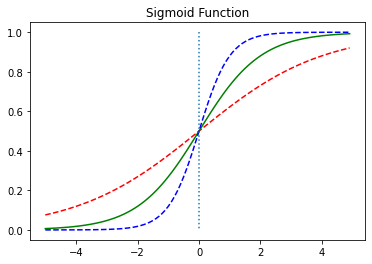

In [14]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

W의 값에 따라 그래프의 경사도가 변한다. 
- 앞서 선형 회귀에서 가중치 W는 직선의 기울기를 의미
- 여기서는 그래프의 경사도를 결정 -> W의 값이 커지면 경사가 커지고 W의 값이 작아지면 경사가 작아진다. 

##### 3. b값의 변화에 따른 좌, 우 이동

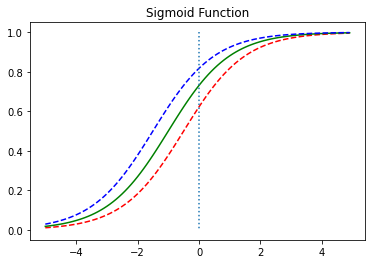

In [15]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

##### 4. 시그모이드 함수를 이용한 분류
- 입력값이 한없이 커지면 1에 수렴하고, 작아지면 0에 수렴한다.
- 시그모이드 함수의 출력값은 0과 1 사이의 값을 가지는데 이 특성을 이용하여 분류 작업에 사용
    - 예를 들어 임계값을 0.5라고 할 때, 출력값이 0.5 이상이면 1(True), 0.5 이하이면 0(False)로 판단
    - 이를 확률이라고 생각하면 해당 레이블에 속할 확률이 50%가 넘으면 해당 레이블로 판단하고, 해당 레이블이 속할 확률이 50%보다 낮으면 아니라고 판단

------------------------------------------------------------------------------------------------------------

#### 3. 비용함수(Cost function)
- 로지스틱 회귀의 가설의 H(x) = sigmoid(Wx+b)
- 최적의 W와 b를 찾을 수 있는 비용함수를 정의
- 선형 회귀에서 배운 비용 함수인 MSE를 로지스틱 회귀의 비용 함수로 그냥 사용하면 문제점
    - 경사 하강법이 오차가 최소값이 되는 구간에 도착했다고 판단한 그 구간이 실제 오차가 완전히 최소값이 되는 구간이 아닐 수 있다. 
    - 실제 오차가 최소가 되는 구간을 찾을 수 있도록 도와주어야 한다.
    - 만약, 실제 최소가 되는 구간을 잘못 판단하면 최적의 가중치 W가 아닌 다른 값을 택해 모델의 성능이 오르지 않는다. 
    - 이를 전체 함수에 걸쳐 최소값인 글로벌 미니멈이 아닌 특정 구역에서의 최소값인 로컬 미니멈에 도달했다고 한다.(그림참고) 이는 COST가 최소가 되는 가중치 W를 찾는다는 비용 함수의 목적에 맞지 않는다. 

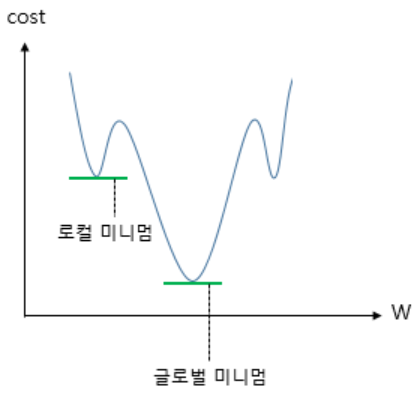

In [18]:
Image("local&global.PNG")

[시그모이드 함수의 특징]
- 출력값이 0과 1사이의 값
- 즉, 실제값이 1일 때 예측값이 0에 가까워지거나, 실제값이 0일 때 예측값이 1에 가까워지면 오차가 커져야 한다.
- 이를 충족하는 함수가 **로그 함수**이다.

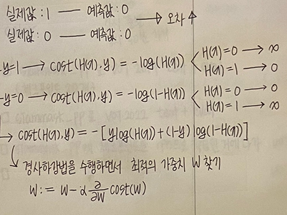

In [19]:
Image("logfunction.PNG")

-------------------------------------------------------------------------------------------------------------

#### 4. 파이토치로 로지스틱 회귀 구현하기

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

In [21]:
torch.manual_seed(1)

In [22]:
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [23]:
# 앞과 마찬가지로 행렬 연산을 사용하여 가설식 세우기
# x_train, y_train의 크기 확인
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [25]:
# x_train을 X라고 하고, 이와 곱해지는 가중치 벡터를 W라고 했을 때, XW가 성립되기 위해서는 W 벡터의 크기는 2x1
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [29]:
# 가설식 세우기
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

In [30]:
# W와 b는 torch.zeros를 통해 전부 0으로 초기화 된 상태
# 예측값 출력
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [31]:
# 가설식을 좀 더 간단하게 구현 가능
# 파이토치에서 시그모이드 함수를 이미 구현하여 제공
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [32]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [33]:
# 현재 예측값과 실제값 사이의 cost 구현
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [35]:
# 6개의 원소 중에서 하나의 샘플(원소)에서만 오차를 구하는 식 작성
-(y_train[0] * torch.log(hypothesis[0]) + (1-y_train[0]) * torch.log(1-hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

In [37]:
# 모든 원소에 대해서 오차 구하기
losses = -(y_train * torch.log(hypothesis) + (1-y_train) * torch.log(1-hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [38]:
# 전체 오차에 대한 평균
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [39]:
# 파이토치에서는 로지스틱 회귀의 비용함수를 이미 구현해서 제공
# torch.nn.functional as F와 같이 임포트 한 후에 F.binary_cross_entropy과 같이 사용
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

모델 훈련 과정까지 추가한 전체 코드

In [40]:
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [41]:
# 모델 초기화
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W,b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1) : 
    # cost
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + (1-y_train) * torch.log(1-hypothesis)).mean()
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0 : 
        print('Epoch {:4d}/{} Cost : {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost : 0.693147
Epoch  100/1000 Cost : 0.134722
Epoch  200/1000 Cost : 0.080643
Epoch  300/1000 Cost : 0.057900
Epoch  400/1000 Cost : 0.045300
Epoch  500/1000 Cost : 0.037261
Epoch  600/1000 Cost : 0.031673
Epoch  700/1000 Cost : 0.027556
Epoch  800/1000 Cost : 0.024394
Epoch  900/1000 Cost : 0.021888
Epoch 1000/1000 Cost : 0.019852


In [43]:
# 예측
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [44]:
prediction = hypothesis >= torch.Tensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [45]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)
